# Image classification w/ Neural Networks in Python
___

by Irem Arici

Feb, 2024

In [19]:
import cv2 #openCV
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import models, layers, datasets
import tensorflow as tf

In [3]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

In [4]:
# 0 to 255

training_images, testing_images = training_images / 255, testing_images / 255

In [5]:
class_names = ["Plane", "Car", "Bird", "Cat", "Deer", "Dog", "Frog",
              "Horse", "Ship", "Truck"]

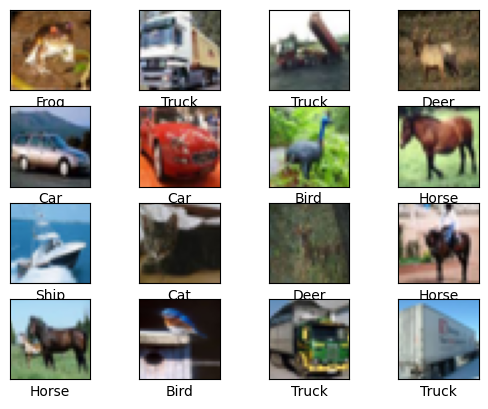

In [6]:
# some images from training set

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
    
plt.show()

In [7]:
# limit dataset so save computing power when training the neural network

training_images = training_images[:20000]
training_labels = training_labels[:20000]

testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

# Building Neural Network

In [8]:
model = models.Sequential()

In [9]:
# NN Layers

model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape = (32,32,3)))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation="relu"))

model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation="relu"))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation="relu"))

model.add(layers.Dense(10, activation="softmax"))

#Compiler

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",
             metrics = ["accuracy"])

model.fit(training_images, training_labels, epochs=10,
         validation_data=(testing_images,testing_labels))

Epoch 1/10
625/625 [==============================] - 10s 16ms/step - loss: 1.7500 - accuracy: 0.3566 - val_loss: 1.4512 - val_accuracy: 0.4753
Epoch 2/10
625/625 [==============================] - 10s 15ms/step - loss: 1.3701 - accuracy: 0.5097 - val_loss: 1.4199 - val_accuracy: 0.5030
Epoch 3/10
625/625 [==============================] - 9s 15ms/step - loss: 1.2245 - accuracy: 0.5646 - val_loss: 1.2166 - val_accuracy: 0.5600
Epoch 4/10
625/625 [==============================] - 10s 15ms/step - loss: 1.1208 - accuracy: 0.6041 - val_loss: 1.1550 - val_accuracy: 0.5895
Epoch 5/10
625/625 [==============================] - 10s 16ms/step - loss: 1.0573 - accuracy: 0.6287 - val_loss: 1.0825 - val_accuracy: 0.6160
Epoch 6/10
625/625 [==============================] - 11s 17ms/step - loss: 0.9889 - accuracy: 0.6511 - val_loss: 1.0542 - val_accuracy: 0.6252
Epoch 7/10
625/625 [==============================] - 11s 17ms/step - loss: 0.9227 - accuracy: 0.6758 - val_loss: 1.0669 - val_accuracy: 

## Loss & accuracy of the model

In [10]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

model.save("image_classifier.model")

125/125 [==============================] - 1s 5ms/step - loss: 1.0012 - accuracy: 0.6600
Loss: 1.0012227296829224
Accuracy: 0.6600000262260437
INFO:tensorflow:Assets written to: image_classifier.model/assets


INFO:tensorflow:Assets written to: image_classifier.model/assets


## Model predictions

In [11]:
model = models.load_model("image_classifier.model")

1/1 [==============================] - 0s 14ms/step
Prediction is Car


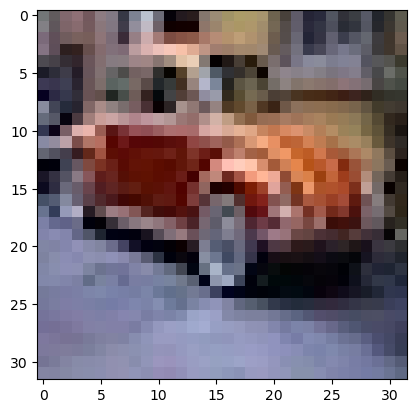

In [30]:
# Correct prediction

img = cv2.imread("car.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img, cmap=plt.cm.binary)

prediction = model.predict(np.array([img]) / 255)

index = np.argmax(prediction)

print(f"Prediction is {class_names[index]}")

1/1 [==============================] - 0s 14ms/step
Prediction is Dog


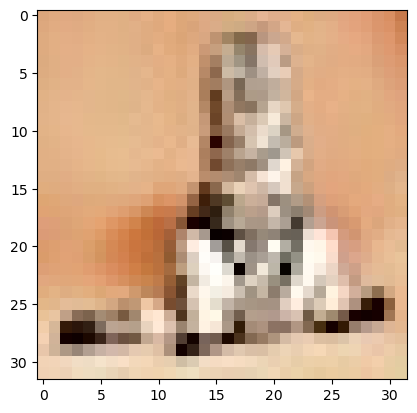

In [31]:
#Wrong prediction!

img1 = cv2.imread("cat.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(img1, cmap=plt.cm.binary)

prediction = model.predict(np.array([img1]) / 255)

index = np.argmax(prediction)

print(f"Prediction is {class_names[index]}")